

Код представляет собой пример использования модели логистической регрессии для классификации данных на основе даты публикации. В качестве датасета используется набор данных с GitHub, а имено датасет all-bigvul-patches "https://raw.githubusercontent.com/TQRG/security-patches-dataset/main/data/bigvul/all-bigvul-patches.csv".

1. Импорт необходимых библиотек и загрузка датасета:
   - Используются библиотеки pandas для работы с данными, matplotlib для визуализации данных, sklearn для машинного обучения.
   - Загружается датасет с помощью pandas.

2. Обработка данных:
   - Удаляются столбцы без имени.
   - Выводится информация о датасете.
   - В столбце 'summary' заполняются пропуски пустыми строками.
   - Удаляются строки с пропущенными значениями в столбце 'score'.

3. Визуализация датасета:
   - Строится гистограмма распределения целевой переменной 'score'.

4. Предобработка данных:
   - Применяется метод векторизации CountVectorizer для преобразования данных в числовой формат.
   - Выбирается целевая переменная и применяется метод LabelEncoder для ее кодирования.

5. Разделение данных на обучающую и тестовую выборки:
   - Используется функция train_test_split для разделения данных на обучающую и тестовую выборки.

6. Выбор модели и обучение:
   - В качестве модели выбирается логистическая регрессия.
   - Производится обучение модели на обучающей выборке.

7. Предсказание на тестовой выборке и оценка модели:
   - Производится предсказание на тестовой выборке.
   - Вычисляется F1-мера с использованием функции f1_score.
   - Выводится значение F1-меры.

8. Визуализация результата:
   - Строится матрица ошибок с использованием функции confusion_matrix.
   - Визуализируется матрица ошибок.

В данном случае, модель логистической регрессии дает наилучшую оценку точности по F1-мере, так как F1-мера - это среднее гармоническое точности и полноты, которое может быть использовано для оценки качества модели.

Index(['authentication_required', 'availability_impact', 'cve_id', 'cve_page',
       'cwe_id', 'access_complexity', 'confidentiality_impact',
       'integrity_impact', 'publish_date', 'score', 'summary', 'update_date',
       'vulnerability_classification', 'refs', 'commit_id', 'commit_message',
       'files_changed', 'lang', 'project', 'version_after_fix',
       'version_before_fix', 'code_refs'],
      dtype='object')
        authentication_required        availability_impact             cve_id  \
count                      1252                       1212               1172   
unique                      961                        242                242   
top      \"filename\": \"DEPS\"   \"status\": \"modified\"   \"additions\": 1   
freq                         77                        927                326   

                 cve_page           cwe_id access_complexity  \
count                1148             1117              1093   
unique                212             

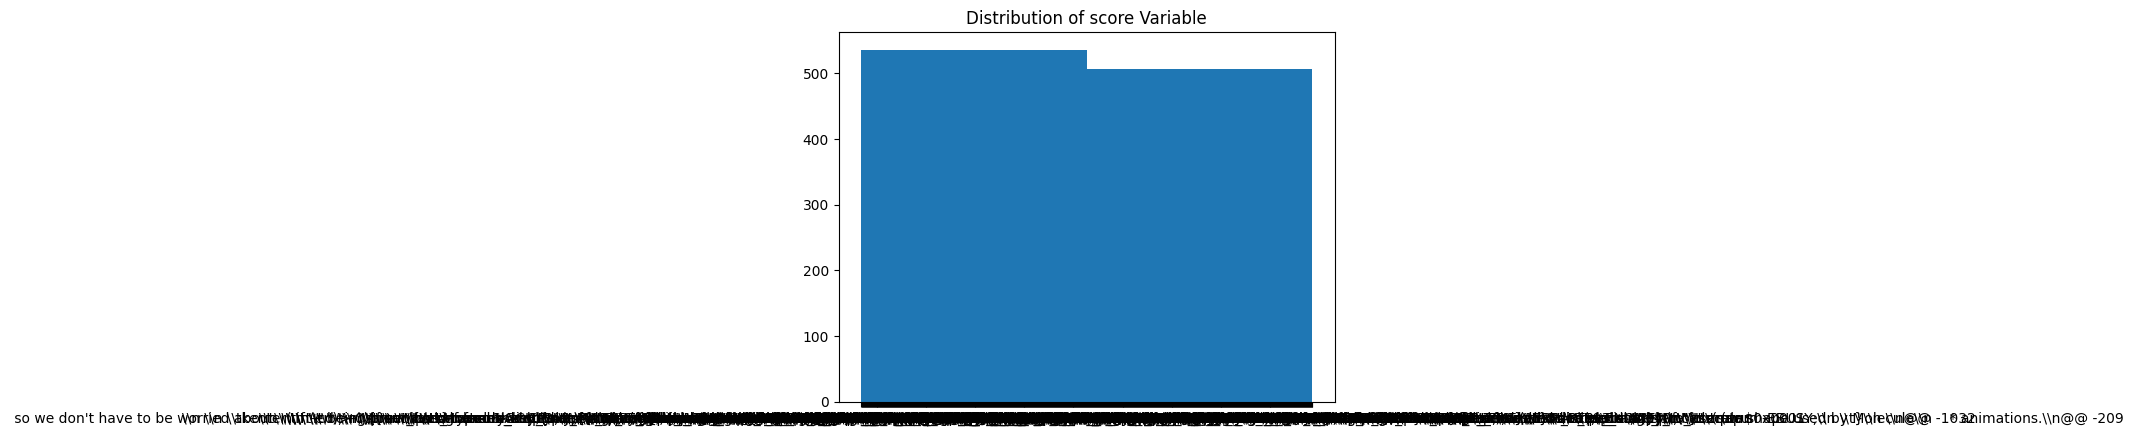

F1 Score: 0.04784688995215311


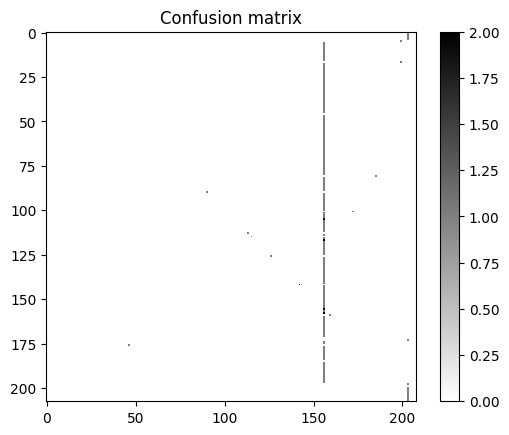

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Загрузка датасета
url = "https://raw.githubusercontent.com/TQRG/security-patches-dataset/main/data/bigvul/all-bigvul-patches.csv"
data = pd.read_csv(url, quotechar='"', on_bad_lines='skip')

# Удаление столбцов без имени
data = data.loc[:, ~data.columns.str.startswith('Unnamed')]

# Проверка наличия столбцов
print(data.columns)

# Описание датасета
print(data.describe())
print(data.info())

# Заполнение пропусков в столбце 'summary' пустой строкой
data['summary'] = data['summary'].fillna('')

# Удаление строк с пропущенными значениями в столбце 'score'
data = data.dropna(subset=['score'])

# Визуализация датасета
# Например, гистограмма распределения целевой переменной
plt.hist(data['score'], bins=2)
plt.title('Distribution of score Variable')
plt.show()

# Предобработка данных
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['publish_date'])

# Выбор целевой переменной
le = LabelEncoder()
y = le.fit_transform(data['score'])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор модели и обучение
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
f1 = f1_score(y_test, y_pred, average='micro')  # Изменение average на 'micro'
print(f'F1 Score: {f1}')

# Визуализация результата
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='binary', interpolation='None')
plt.title('Confusion matrix')
plt.colorbar()
plt.show()